In [0]:
# Imports
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Data Directory
DATA_DIR = '/content/drive/My Drive/Colab Notebooks'

# Sample image
img_path = DATA_DIR + '/Places365_test_00000003.jpg'

In [0]:
# Originial image
img = cv2.imread(img_path)
# cv2_imshow(img)

In [116]:
img.shape

(683, 512, 3)

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Round Function
def round_numpy_array(numpy_array):
  new_rounded_list = []

  for row in numpy_array:
    new_row = []
    for element in row:
      new_row.append(round(element, -1))
    new_rounded_list.append(new_row)
  
  return new_rounded_list

In [0]:
# Round and calculate
def round_and_calculate(a_list, b_list):
  rounded_a_list = round_numpy_array(a_list.tolist())
  rounded_b_list = round_numpy_array(b_list.tolist())
  index_array = []

  for i in range(0, len(rounded_a_list)):
    new_row = []
    for j in range(0, len(rounded_a_list[i])):
      index = calculate_color_array_index(rounded_a_list[i][j], rounded_b_list[i][j])
      new_row.append(index)
    index_array.append(new_row)
  
  return index_array
  
# For Interval of 20
def round_and_calculate_interval_20(a_list, b_list):
  rounded_a_list = round_numpy_array(a_list.tolist())
  rounded_b_list = round_numpy_array(b_list.tolist())
  index_array = []

  for i in range(0, len(rounded_a_list)):
    new_row = []
    for j in range(0, len(rounded_a_list[i])):
      index = calculate_color_index_interval_20(rounded_a_list[i][j], rounded_b_list[i][j])
      new_row.append(index)
    index_array.append(new_row)
  
  return index_array

# Find color array index
# Interval == 10
def calculate_color_array_index(a, b):
  index = (a / 10) * 26 + (b / 10)
  return int(index)

# Interval == 20
def calculate_color_index_interval_20(a,b):
  if (a == 250):
    a = 240
  if (b == 250):
    b = 240
  index = round((a / 20), 0) * 13 + round((b / 20), 0)
  return int(index)

In [0]:
def process_image(image_path, width, height):
  img = cv2.imread(image_path) # read image
  img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) # convert from BGR to LAB
  # resized_img = cv2.resize(img_lab, (width,height)) # resize image
  # TODO Rename these variables, add boolean for resizing
  resized_img = img_lab

  # split into L, a and b
  L_array = resized_img[:, :, 0]
  a_array = resized_img[:, :, 1]
  b_array = resized_img[:, :, 2]

  target_array = round_and_calculate(a_array, b_array)
  
  # NumPy data type needs to be 'dtype=np.uint16' or higher
  numpy_target_array = np.array(target_array, dtype=np.uint16)

  return (L_array, numpy_target_array)

# For Interval 20
def process_image_interval_20(image_path, width, height):
  img = cv2.imread(image_path) # read image
  img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) # convert from BGR to LAB
  # resized_img = cv2.resize(img_lab, (width,height)) # resize image
  # TODO Rename these variables, add boolean for resizing
  resized_img = img_lab

  # split into L, a and b
  L_array = resized_img[:, :, 0]
  a_array = resized_img[:, :, 1]
  b_array = resized_img[:, :, 2]

  target_array = round_and_calculate_interval_20(a_array, b_array)

  # NumPy data type needs to be 'dtype=np.uint16' or higher
  numpy_target_array = np.array(target_array, dtype=np.uint16)

  return (L_array, numpy_target_array)

In [0]:
L, y = process_image(img_path, 220, 220)

In [122]:
print(L)

[[ 43  48  47 ...  68  66  71]
 [ 43  48  46 ...  67  64  68]
 [ 45  46  47 ...  67  63  65]
 ...
 [ 19  12  32 ...  72  54  74]
 [ 24  16  35 ...  91 118 140]
 [ 27  19  36 ...  97 170 186]]


In [123]:
print(L.shape)

(683, 512)


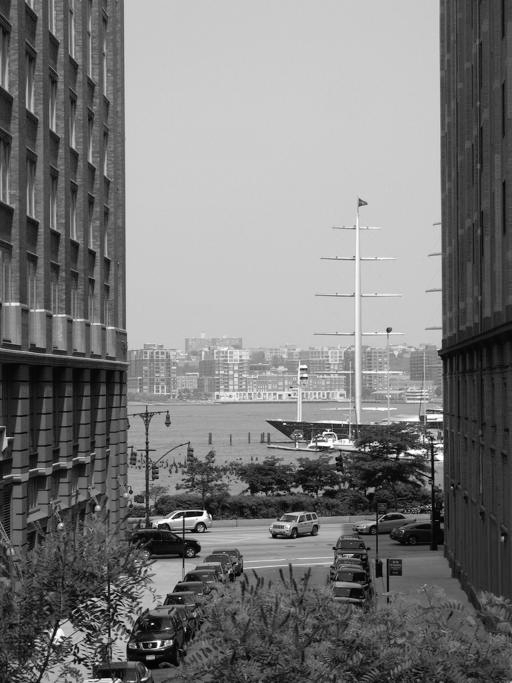

In [124]:
cv2_imshow(L)

In [0]:
# print(y)

In [0]:
# Create Color Array
# min = 0, max = 250, interval = 10
def create_color_array(min, max, interval):
  ab_color_list = []

  for i in range(min, max, interval):
    for j in range(min, max, interval):
      ab_color_list.append([i, j])
      j += interval
    i += interval
  
  return ab_color_list

def convert_numpy_target_array(color_array, target_numpy_array):
  target_list = target_numpy_array.tolist()
  a_list = []
  b_list = []

  for i in range(0, len(target_list)):
    new_a_list_row = []
    new_b_list_row = []
    for j in range(0, len(target_list[i])):
      a = color_array[target_list[i][j]][0]
      b = color_array[target_list[i][j]][1]
      new_a_list_row.append(a)
      new_b_list_row.append(b)
    a_list.append(new_a_list_row)
    b_list.append(new_b_list_row)
    
    # L, a, b require specific data types 'dtype=uint8'
    a_list_numpy_array = np.array(a_list, dtype=np.uint8)
    b_list_numpy_array = np.array(b_list, dtype=np.uint8)

  return (a_list_numpy_array, b_list_numpy_array)


In [0]:
ab_color_list = create_color_array(0, 260, 10)

In [0]:
# print(ab_color_list)

In [129]:
# a, b values for class 500
# a = 190, b = 60
ab_color_list[500]

[190, 60]

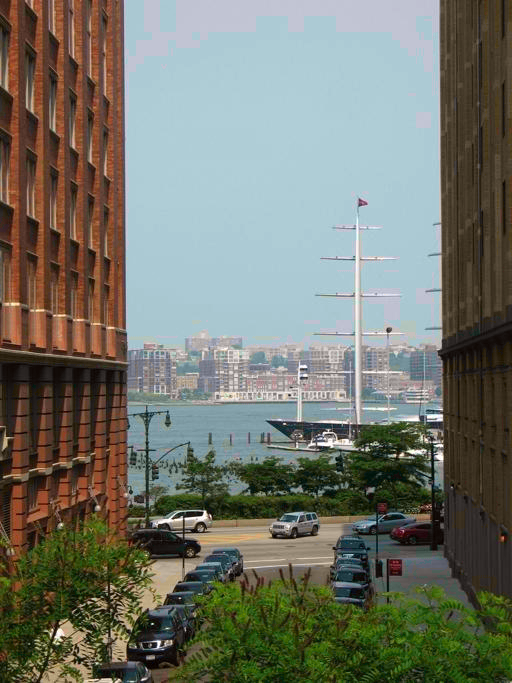

In [130]:
a, b = convert_numpy_target_array(ab_color_list, y)
# L, a, b require specific data type: 'dtype=uint8'
merged_image = cv2.merge((L, a, b))
image_bgr = cv2.cvtColor(merged_image, cv2.COLOR_LAB2BGR)
cv2_imshow(image_bgr)

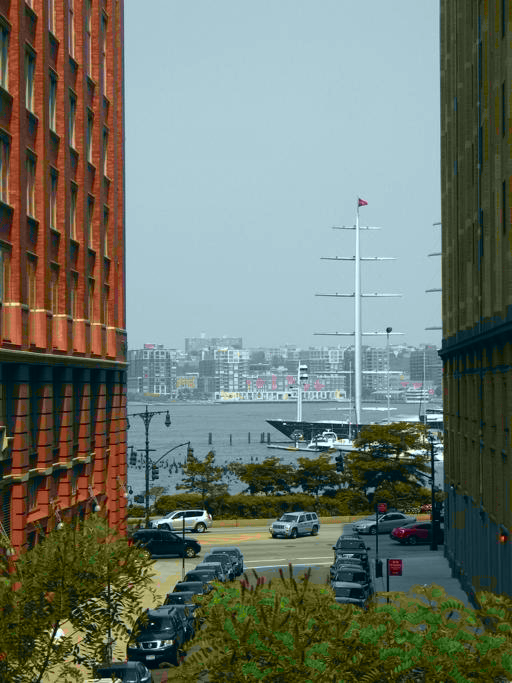

In [131]:
ab_color_list_interval_20 = create_color_array(0, 260, 20)
L_interval_20, y_interval_20 = process_image_interval_20(img_path, 220, 220)
a_interval_20, b_interval_20 = convert_numpy_target_array(ab_color_list_interval_20, y_interval_20)
merged_image_interval_20 = cv2.merge((L_interval_20, a_interval_20, b_interval_20))
image_bgr_interval_20 = cv2.cvtColor(merged_image_interval_20, cv2.COLOR_LAB2BGR)
cv2_imshow(image_bgr_interval_20)